In [1]:
%matplotlib inline
"""
Read more about pd.set_option here:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html
"""
import pandas as pd; pd.set_option('display.max_columns', None)
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2020.csv')

df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,Derrick Henry,TEN,RB,26.0,16,16,31,19,0,0,0,2027,17,378,114,0,314.0,0,3,2
1,Alvin Kamara,NOR,RB,25.0,15,10,107,83,0,0,0,932,16,187,756,5,295.0,0,1,0
2,Dalvin Cook,MIN,RB,25.0,14,14,54,44,0,0,0,1557,16,312,361,1,294.0,0,5,3
3,Davante Adams,GNB,WR,28.0,14,14,149,115,0,0,0,0,0,0,1374,18,243.0,0,1,1
4,Travis Kelce,KAN,TE,31.0,15,15,145,105,4,0,2,0,0,0,1416,11,208.0,0,1,1


In [6]:
"""
View the documentation for the info method here
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html
"""

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         626 non-null    object 
 1   Tm             626 non-null    object 
 2   Pos            578 non-null    object 
 3   Age            625 non-null    float64
 4   G              626 non-null    int64  
 5   GS             626 non-null    int64  
 6   Tgt            626 non-null    int64  
 7   Rec            626 non-null    int64  
 8   PassingYds     626 non-null    int64  
 9   PassingTD      626 non-null    int64  
 10  PassingAtt     626 non-null    int64  
 11  RushingYds     626 non-null    int64  
 12  RushingTD      626 non-null    int64  
 13  RushingAtt     626 non-null    int64  
 14  ReceivingYds   626 non-null    int64  
 15  ReceivingTD    626 non-null    int64  
 16  FantasyPoints  570 non-null    float64
 17  Int            626 non-null    int64  
 18  Fumbles   

In [9]:
pd.set_option('chained_assignment', None) # we don't care about overriding the original df

# you could also do rb_df = df.loc[df['Pos'] == 'RB'].copy()
rb_df = df.loc[df['Pos'] == 'RB']

# Usage is defined as Tgt + RushingAtt
rb_df['Usage/G'] = (rb_df['Tgt'] + rb_df['RushingAtt']) / rb_df['G'] 

"""
Here, we're just looking at the last column of our DataFrame here.
"""

rb_df.iloc[:, -1:].head()

,Usage/G
0,25.562500
1,19.600000
2,26.142857
11,18.066667
12,18.857143


In [10]:
fantasy_scoring_weights = {
    'RushingYds': 0.1,
    'ReceivingYds': 0.1,
    'ReceivingTD': 6,
    'RushingTD': 6,
    'FumblesLost': -2,
    'Rec': 1 # adjust for PPR
}

"""
Here, we are using apply with axis=1
This allows to map a function across an entire row, instead of across a column.
To learn more information about apply and setting axis=1,
check out the pandas documentation.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
"""

def get_fantasy_points(row):
    
    g = row['G'] # access the G column
    
    fantasy_points = sum([row[column]*weight for column, weight in fantasy_scoring_weights.items()])
    
    return fantasy_points / g

# create a FantasyPoints/G column
rb_df['FantasyPoints/G'] = rb_df.apply(get_fantasy_points, axis=1)

"""
The columns we need here are our Player, Tm, G, all relevant RB columns, Usage/G and FantasyPoints/G (which were just assigned)
"""

rb_df = rb_df[['Player', 'Tm', 'G', 'RushingAtt', 'Tgt'] + list(fantasy_scoring_weights.keys()) + ['Usage/G', 'FantasyPoints/G']]

rb_df.head()

,Player,Tm,G,RushingAtt,Tgt,RushingYds,ReceivingYds,ReceivingTD,RushingTD,FumblesLost,Rec,Usage/G,FantasyPoints/G
0,Derrick Henry,TEN,16,378,31,2027,114,0,17,2,19,25.562500,20.693750
1,Alvin Kamara,NOR,15,187,107,932,756,5,16,0,83,19.600000,25.186667
2,Dalvin Cook,MIN,14,312,54,1557,361,1,16,3,44,26.142857,23.700000
11,Jonathan Taylor,IND,15,232,39,1169,299,1,11,1,36,18.066667,16.853333
12,Aaron Jones,GNB,14,201,63,1104,355,2,9,0,47,18.857143,18.492857


c:\Users\alexc\Documents\Programming\Python\Fantasy_Football\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RushingAtt', ylabel='Tgt'>

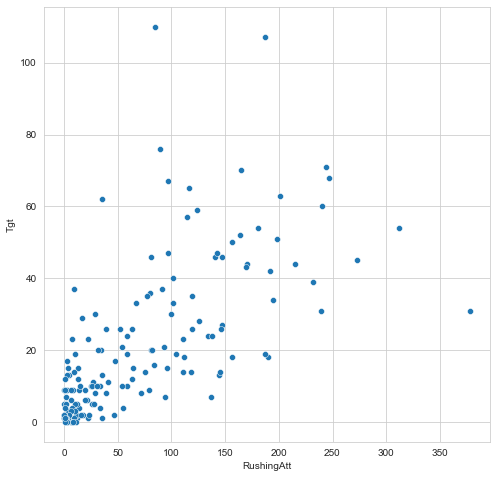

In [11]:
sns.set_style('whitegrid') # setting style for visualizations

"""
seaborn documentation for scatter plots:
https://seaborn.pydata.org/generated/seaborn.scatterplot.html
"""

# set figure size in inches
# https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.figure.html
plt.figure(figsize=(8, 8))

sns.scatterplot(rb_df['RushingAtt'], rb_df['Tgt'])

<AxesSubplot:xlabel='Usage/G', ylabel='FantasyPoints/G'>

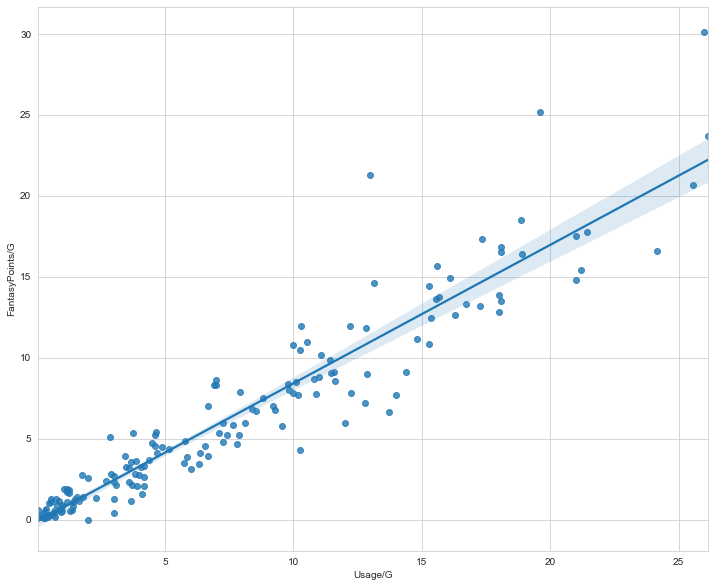

In [20]:
"""
documentation for sns.regplot
https://seaborn.pydata.org/generated/seaborn.regplot.html
"""

plt.figure(figsize=(12, 10))
sns.regplot(x=rb_df['Usage/G'], y=rb_df['FantasyPoints/G'])

<AxesSubplot:xlabel='RushingAtt', ylabel='Count'>

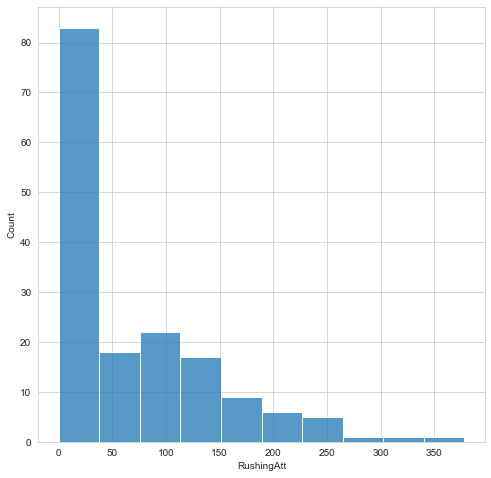

In [19]:
# distplot for RB rushing attempts
# https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot
plt.figure(figsize=(8, 8))
sns.histplot(rb_df['RushingAtt'])